In [2]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sympy.solvers import solve
from sympy import Symbol
import numpy as np
import pandas as pd
import cmath
from scipy.optimize import linesearch
import scipy as sp
import scipy.optimize


import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# STEEPEST DESCENT
-----------

In [3]:
# x1 = Symbol('x1')
# x2 = Symbol('x2')
# f = 100*pow(x2-pow(x1,2),2) + pow(1-x1,2)
# print(f)
# deriv_1 = np.array([f.diff(x1), f.diff(x2)])
# print(deriv_1[0])
# print(deriv_1[1])

# x1 = Symbol('x1')
# x2 = Symbol('x2')
# f = pow((x1+x2),4) + x2**2
# print(f)
# deriv_1 = np.array([f.diff(x1), f.diff(x2)])
# print(deriv_1[0])
# print(deriv_1[1])

# x1 = Symbol('x1')
# x2 = Symbol('x2')
# f = (x1-1)**2 + (x2-1)**2 + 100*(x1**2 + x2**2 -0.25)**2
# print(f)
# deriv_1 = np.array([f.diff(x1), f.diff(x2)])
# print(deriv_1[0])
# print(deriv_1[1])

In [4]:

epsilon = 10e-5

# class SetFunction()
#     def __init__(self):
#         self.fnc = 
def function3(x):
    x1 = x[0]
    x2 = x[1]
    return (-x1 + 1)**2 + 100*(-x1**2 + x2)**2

def objective3(x):
    x1 = x[0]
    x2 = x[1]
    a = -400*x1*(-x1**2 + x2) + 2*x1 - 2
    b = -200*x1**2 + 200*x2
    return [a,b]

######################################################

def function4(x):
    x1 = x[0]
    x2 = x[1]
    return x2**2 + (x1 + x2)**4

def objective4(x):
    x1 = x[0]
    x2 = x[1]
    a = 4*(x1 + x2)**3
    b = 2*x2 + 4*(x1 + x2)**3
    return [a,b]

######################################################

def function5a(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2

def objective5a(x):
    x1 = x[0]
    x2 = x[1]
    a = 4*x1*(x1**2 + x2**2 - 0.25) + 2*x1 - 2
    b = 4*x2*(x1**2 + x2**2 - 0.25) + 2*x2 - 2
    return [a,b]

######################################################

def function5b(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 1)**2 + (x2 - 1)**2 + 10*(x1**2 + x2**2 - 0.25)**2

def objective5b(x):
    x1 = x[0]
    x2 = x[1]
    a = 40*x1*(x1**2 + x2**2 - 0.25) + 2*x1 - 2
    b = 40*x2*(x1**2 + x2**2 - 0.25) + 2*x2 - 2
    return [a,b]

######################################################
def function5c(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 1)**2 + (x2 - 1)**2 + 100*(x1**2 + x2**2 - 0.25)**2

def objective5c(x):
    x1 = x[0]
    x2 = x[1]
    a = 400*x1*(x1**2 + x2**2 - 0.25) + 2*x1 - 2
    b = 400*x2*(x1**2 + x2**2 - 0.25) + 2*x2 - 2
    return [a,b]

######################################################
alpha_arr = []
def steepestDescentUpdate(xk, deriv1_xk, Q=[], function=None, objective=None):
    """
        xk:        Current value 
        deriv1_xk: First order derivative of function f(xk)
        Q :        Q formed when we convert the function in standard form
                   Also equivallent to Hessian matrix, Computation is needed only once
                   No update is required,
                   Note: The hessian in Newton is computationally expensive, 
                   since we do the matrix inversion
        
        pk (Search direction) = - deriv1_xk 
    """
    pk = -1 * deriv1_xk # We just take a step in the negative direction of the gradient
    if len(Q) >=1 :
        alpha = -1 * np.dot(np.transpose(pk), deriv1_xk) / np.dot(np.dot(np.transpose(pk), Q), pk)
    else: # Implementing the line search algorithm
        a = linesearch.line_search(function,objective,xk,pk)
        if not a[0]:
            alpha = float(alpha_arr[len(alpha_arr)-1]/2)
        else:
            alpha_arr.append(a[0])
            alpha = alpha_arr[len(alpha_arr)-1]

    xk1 = xk - alpha*deriv1_xk
    return xk1, alpha, pk

In [5]:
def iterateNonQuadratic(f, xk, deriv_1, function, objective, numFeature, numSteps, should_print):
    fx_arr = []
    gradientNorm_arr = []
    alpha_arr = []
    pk_arr = []
    xk1_arr = []
    for step in range(numSteps):
#         print('stepstepstep ', step)
        # Solve for gradient
        fx = f.evalf(subs={x1:xk[0], x2:xk[1]})
        fx_arr.append(fx)
        gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1]}) for eq in deriv_1], dtype='float32')
        gradientNorm = np.linalg.norm(gradient_xk)
        gradientNorm_arr.append(np.linalg.norm(gradientNorm))
        
        if should_print:
            if (step+1)%should_print == 0:
                print('')
                print ('##########################################################')
                print ('Function F at x: f(x) ', fx)
                print ('Gradient at xk%s is: '%str(step), gradient_xk)
                print ("####### Gradient Norm: ", gradientNorm)
                print('The updated Value xk%s is \n'%(step+1), xk)
                
                
        if np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon) == len(gradient_xk) or (step == 1000):
            print('The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)')
            break

        xk1, alpha, pk = steepestDescentUpdate(xk=xk, deriv1_xk=gradient_xk, 
                                    Q=[], function=function, objective=objective)
        xk = xk1

        pk_arr.append(pk)
        alpha_arr.append(alpha)
        xk1_arr.append(xk1)

    return fx_arr, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr


def iterateQuadratic(f, xk, deriv_1, Q, numFeatures, numSteps, should_print):
    fx_arr = []
    gradientNorm_arr = []
    alpha_arr = []
    pk_arr = []
    xk1_arr = []
    for step in range(numSteps): 
        if numFeatures == 3:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) 
                                 for eq in deriv_1], dtype='float32')
            Q_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) 
                          for rows in Q 
                          for cell in rows], dtype='float32').reshape(3,3)
            
        elif numFeatures == 2:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1]}) for eq in deriv_1], dtype='float32')
            Q_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1]}) 
                          for rows in Q
                          for cell in rows], dtype='float32').reshape(2,2)
        else:
            raise ValueError('Num Features doesnt match the handled condition')
            
        fx_arr.append(fx)
        gradientNorm = np.linalg.norm(gradient_xk)
        gradientNorm_arr.append(gradientNorm)

        if should_print:
            if (step+1)%should_print == 0:
                print('')
                print ('##########################################################')
                print ('Function F at x: f(x) ', fx)
                print ('Gradient at xk%s is: '%str(step), gradient_xk)
                print ("####### Gradient Norm: ", gradientNorm)
                print('The updated Value xk%s is \n'%(step+1), xk)
                
#         print ((gradientNorm/(1+np.abs(gradient_xk))))
#         print ((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon)
#         print (np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon))
        if np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon) == len(gradient_xk) or (step == 1000):
            print('The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)')
            break

        xk1, alpha, pk = steepestDescentUpdate(xk=xk, deriv1_xk=gradient_xk, Q=Q_lv)
        xk = xk1

        pk_arr.append(pk)
        alpha_arr.append(alpha)
        xk1_arr.append(xk1)
        
    return fx_arr, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr


def plot(subplotArr, rows=1, columns=2, figsize=(10, 3), contour=False):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, arrVal in enumerate(subplotArr):
        if no == 0 and contour:
            x1 = subplotArr[0]["x1"]
            x2 = subplotArr[0]['x2']
            z = subplotArr[0]['z']
            sol_x1 = subplotArr[0]['sol_x1']
            sol_x2 = subplotArr[0]['sol_x2']
            axs[no].contourf(x1,x2,z)
            axs[no].plot(sol_x1, sol_x2, 'r')
            axs[no].set_title('Contour Plot for the function')
        elif no == 0 and not contour:
            axs[no].plot(np.arange(len(subplotArr[0]["functionVal"])), subplotArr[0]["functionVal"])
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Function f(x) at step')
            axs[no].set_title('Function Vs Num Iteration')
        else:
            axs[no].plot(np.arange(len(subplotArr[1]["gradientNorm"])), subplotArr[1]["gradientNorm"])
#             axs[no].plot(np.arange(len(arrVal)), arrVal)
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Gradient Norm at step')
            axs[no].set_title('Gradient Norm Vs Num Iteration')
            
    plt.show()        

## Test subject for example 12.1 in book page: 404

In [34]:
# x1 = Symbol('x1')
# x2 = Symbol('x2')
# x3 = Symbol('x3')

# f = 0.5*pow(x1,2) + 0.5*5*pow(x2,2) + 0.5*25*pow(x3,2) + x1 +x2 +x3
# deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
# print ('First order Derivative: ', deriv_1)
# Q = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2,x3]]).reshape(3,3)  # Q is obtained by converting the funciton into quadratic form, which is equivallent to 2nd order derivative in all our case
# print ('Second order Derivative: \n', Q)

# # Initialize Xk
# xk = np.array([0,0,0])

# iterate(xk, deriv_1, Q, numFeatures=3, numSteps=5, should_print=1)

#### Solution d(1)

First order Derivative:  [2*x1 2*x2 2*x3]
Second order Derivative: 
 [[2 0 0]
 [0 2 0]
 [0 0 2]]

##########################################################
Function F at x: f(x)  3.00000000000000
Gradient at xk0 is:  [ 2.  2.  2.]
####### Gradient Norm:  3.4641
The updated Value xk1 is 
 [1 1 1]

##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk1 is:  [ 0.  0.  0.]
####### Gradient Norm:  0.0
The updated Value xk2 is 
 [ 0.  0.  0.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


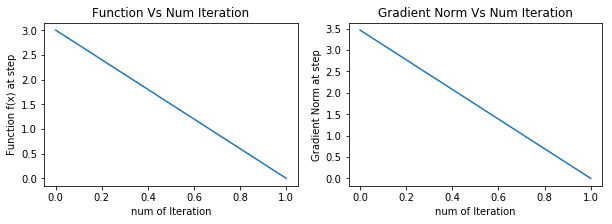

,pk,alpha,xk
0,"[-2.0, -2.0, -2.0]",0.5,"[0.0, 0.0, 0.0]"


In [12]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')

f = pow(x1,2) + pow(x2,2) + pow(x3,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
print ('First order Derivative: ', deriv_1)
Q = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2,x3]]).reshape(3,3)  # Q is obtained by converting the funciton into quadratic form, which is equivallent to 2nd order derivative in all our case
print ('Second order Derivative: \n', Q)

# Initialize Xk
xk = np.array([1,1,1])
fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterateQuadratic(f, xk, deriv_1, Q, 
                                                                            numFeatures=3, numSteps=10, 
                                                                            should_print=1)
outData = pd.DataFrame(columns=["pk","alpha","xk"])
outData["pk"] = pk_arr
outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([dict(functionVal = fx_array), dict(gradientNorm = gradientNorm_arr)])

outData

# Solution d(2)

First order Derivative:  [2*x1 - 2*x2 -2*x1 + 4*x2 - 2]
Second order Derivative: 
 [[2 -2]
 [-2 4]]

##########################################################
Function F at x: f(x)  -0.999998092651367
Gradient at xk19 is:  [-0.00195312  0.        ]
####### Gradient Norm:  0.00195312
The updated Value xk20 is 
 [ 0.99804688  0.99902344]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


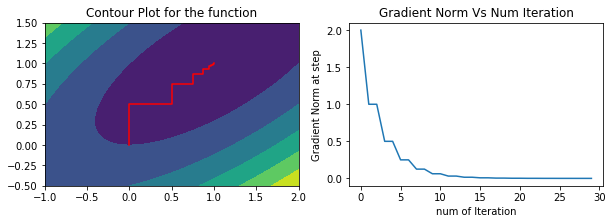

,pk,alpha,xk
0,"[-0.0, 2.0]",0.25,"[0.0, 0.5]"
1,"[1.0, -0.0]",0.50,"[0.5, 0.5]"
2,"[-0.0, 1.0]",0.25,"[0.5, 0.75]"
3,"[0.5, -0.0]",0.50,"[0.75, 0.75]"
4,"[-0.0, 0.5]",0.25,"[0.75, 0.875]"
5,"[0.25, -0.0]",0.50,"[0.875, 0.875]"
6,"[-0.0, 0.25]",0.25,"[0.875, 0.9375]"
7,"[0.125, -0.0]",0.50,"[0.9375, 0.9375]"
8,"[-0.0, 0.125]",0.25,"[0.9375, 0.96875]"
9,"[0.0625, -0.0]",0.50,"[0.96875, 0.96875]"


In [16]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1,2) + 2*pow(x2,2) - 2*x1*x2 - 2*x2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
print ('First order Derivative: ', deriv_1)
Q = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2]]).reshape(2,2)  # Q is obtained by converting the funciton into quadratic form, which is equivallent to 2nd order derivative in all our case
print ('Second order Derivative: \n', Q)

# Initialize Xk
xk = np.array([0,0], dtype='float32')

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterateQuadratic(f, xk, deriv_1, Q, 
                                                                          numFeatures=2, numSteps=100, 
                                                                          should_print=20)

outData = pd.DataFrame(columns=["pk","alpha","xk"])
outData["pk"] = pk_arr
outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

###########  Plot  ###########
x1_x2 = np.vstack(([0,0], np.asarray(xk1_arr)))
u = np.linspace(-1,2,5000)
v = np.linspace(-0.5,1.5,5000)
x1,x2 = np.meshgrid(u,v)
z = pow(x1,2) + 2*pow(x2,2) - 2*x1*x2 - 2*x2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData

# Solution d(3)

-400*x1*(-x1**2 + x2) + 2*x1 - 2
-200*x1**2 + 200*x2

##########################################################
Function F at x: f(x)  0.000857607853053252
Gradient at xk199 is:  [-0.01955248 -0.02007916]
####### Gradient Norm:  0.0280263
The updated Value xk200 is 
 [ 0.97073227  0.94222075]

##########################################################
Function F at x: f(x)  0.000355085037689682
Gradient at xk399 is:  [ 0.01330922 -0.02594129]
####### Gradient Norm:  0.0291562
The updated Value xk400 is 
 [ 0.98120099  0.96262568]

##########################################################
Function F at x: f(x)  5.98032735667963e-5
Gradient at xk599 is:  [-0.00570423 -0.00491523]
####### Gradient Norm:  0.00752979
The updated Value xk600 is 
 [ 0.99227065  0.98457646]

##########################################################
Function F at x: f(x)  3.75260229929920e-5
Gradient at xk799 is:  [-0.00620088 -0.00304215]
####### Gradient Norm:  0.00690692
The updated Value xk800 is 
 [ 0.9

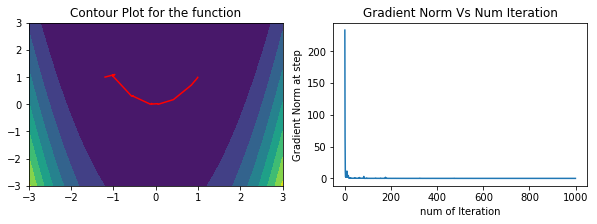

,pk,alpha,xk
0,"[215.6, 88.0]",0.001074,"[-0.968484, 1.0945]"
1,"[-56.7038, -31.3071]",0.000861,"[-1.01733, 1.06753]"
2,"[-9.21774, -6.51332]",0.000842,"[-1.02509, 1.06204]"
3,"[-0.556043, -2.24674]",0.002158,"[-1.02629, 1.0572]"
4,"[2.44152, -0.784897]",0.002227,"[-1.02085, 1.05545]"


In [17]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (-x1 + 1)**2 + 100*(-x1**2 + x2)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
print(deriv_1[0])
print(deriv_1[1])

# Initialize Xk
xk = np.array([-1.2,1], dtype='float32')

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterateNonQuadratic(f, xk, deriv_1, 
                                                 function3, objective3,
                                                 numFeature=2, numSteps=1000, should_print=200)  

print(len(pk_arr), len(alpha_arr), len(xk1_arr))
outData = pd.DataFrame(columns=["pk","alpha","xk"])
outData["pk"] = pk_arr
outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

###########  Plot  ###########
x1_x2 = np.vstack(([-1.2,1], np.asarray(xk1_arr)))
u = np.linspace(-3,3,5000)
x1,x2 = np.meshgrid(u,u)
z = (-x1 + 1)**2 + 100*(-x1**2 + x2)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData.head()

In [15]:
# x1 = Symbol('x1')
# x2 = Symbol('x2')
# f = 100*pow(x2-pow(x1,2),2) + pow(1-x1,2)
# deriv_1 = np.array([f.diff(x1), f.diff(x2)])
# Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
#               [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print ('Q: \n', Q)


# # Initialize Xk
# xk = np.array([-1.2,1], dtype='float32')

# # fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

# fx_array, gradientNorm_arr = iterateQuadratic(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=100)

# plot([fx_array, gradientNorm_arr])

# Solution d(4)

4*(x1 + x2)**3
2*x2 + 4*(x1 + x2)**3

##########################################################
Function F at x: f(x)  8.05956756351018e-6
Gradient at xk49 is:  [ 0.00056763 -0.00105447]
####### Gradient Norm:  0.00119754
The updated Value xk50 is 
 [ 0.05297061 -0.00081105]

##########################################################
Function F at x: f(x)  1.76586242017692e-6
Gradient at xk99 is:  [ 0.00019074 -0.00019246]
####### Gradient Norm:  0.000270961
The updated Value xk100 is 
 [ 0.03645415 -0.0001916 ]

##########################################################
Function F at x: f(x)  7.82690890086872e-7
Gradient at xk149 is:  [  9.98453907e-05  -3.61426821e-04]
####### Gradient Norm:  0.000374965
The updated Value xk150 is 
 [ 0.02945574 -0.00023064]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)
158 158 158


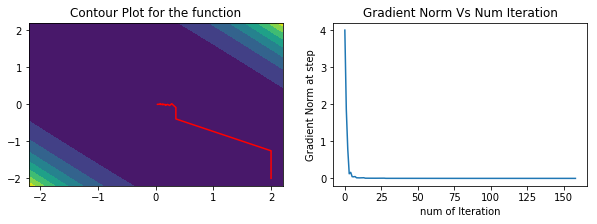

,pk,alpha,xk
0,"[-0.0, 4.0]",0.186146,"[2.0, -1.25542]"
1,"[-1.6512, 0.859632]",1.000000,"[0.348799, -0.395785]"
2,"[0.000414913, 0.791984]",0.389893,"[0.348961, -0.0869959]"
3,"[-0.0719099, 0.102082]",1.000000,"[0.277051, 0.015086]"
4,"[-0.0997284, -0.1299]",0.369004,"[0.240251, -0.0328477]"
5,"[-0.0356865, 0.030009]",1.000000,"[0.204564, -0.00283877]"
6,"[-0.0328353, -0.0271578]",1.000000,"[0.171729, -0.0299965]"
7,"[-0.0113885, 0.0486046]",0.487490,"[0.166177, -0.00630227]"
8,"[-0.0163455, -0.00374101]",1.000000,"[0.149831, -0.0100433]"
9,"[-0.0109263, 0.00916031]",1.000000,"[0.138905, -0.000882971]"


In [19]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = x2**2 + (x1 + x2)**4
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
print(deriv_1[0])
print(deriv_1[1])

# Initialize Xk
xk = np.array([2,-2], dtype='float32')

# fx_array, gradientNorm_arr = iterateNonQuadratic(f, xk, deriv_1, 
#                                                  function4, objective4,
#                                                  numFeature=2, numSteps=300, should_print=50)  

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterateNonQuadratic(f, xk, deriv_1, 
                                                 function4, objective4,
                                                 numFeature=2, numSteps=300, should_print=50)  

print(len(pk_arr), len(alpha_arr), len(xk1_arr))
outData = pd.DataFrame(columns=["pk","alpha","xk"])
outData["pk"] = pk_arr
outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr


###########  Plot  ###########
x1_x2 = np.vstack(([2,-2], np.asarray(xk1_arr)))
u = np.linspace(-2.2,2.2,5000)
x1,x2 = np.meshgrid(u,u)
z = x2**2 + (x1 + x2)**4
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData

In [17]:
# x1 = Symbol('x1')
# x2 = Symbol('x2')
# f = pow(x1+x2,4) + pow(x2,2)
# deriv_1 = np.array([f.diff(x1), f.diff(x2)])
# Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
#                     [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1[0])
# print(deriv_1[1])
# print ('Q: \n', Q)


# # Initialize Xk
# xk = np.array([2,-2], dtype='float32')

# # fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

# fx_array, gradientNorm_arr = iterateQuadratic(f, xk, deriv_1, numFeatures=2, numSteps=1000, should_print=200)

# plot([fx_array, gradientNorm_arr])

# Solution d(5)

### a : (x1 - 1)**2 + (x2 - 1)**2 + (x1**2 + x2**2 - 0.25)**2


4*x1*(x1**2 + x2**2 - 0.25) + 2*x1 - 2
4*x2*(x1**2 + x2**2 - 0.25) + 2*x2 - 2
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)
13 13 13


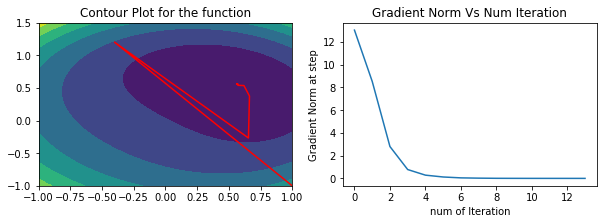

,pk,alpha,xk
0,"[-7.0, 11.0]",0.200205,"[-0.401434, 1.20225]"
1,"[4.98115, -6.92824]",0.212053,"[0.654835, -0.266902]"
2,"[0.0353738, 2.80076]",0.229468,"[0.662952, 0.375781]"
3,"[-0.202904, 0.751329]",0.214253,"[0.61948, 0.536756]"
4,"[-0.284298, 0.0207412]",0.167948,"[0.571732, 0.540239]"
5,"[0.0132619, 0.122698]",0.149191,"[0.573711, 0.558545]"
6,"[-0.0449721, 0.00908696]",0.194295,"[0.564973, 0.56031]"
7,"[0.0041947, 0.020666]",0.140830,"[0.565564, 0.563221]"
8,"[-0.00680033, 0.00151359]",0.199274,"[0.564209, 0.563522]"
9,"[0.000696251, 0.00312836]",0.139404,"[0.564306, 0.563958]"


In [20]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
print(deriv_1[0])
print(deriv_1[1])

# Initialize Xk
xk = np.array([1,-1], dtype='float32')

# fx_array, gradientNorm_arr = iterateNonQuadratic(f, xk, deriv_1, 
#                                                  function5a, objective5a,
#                                                  numFeature=2, numSteps=300, should_print=50)  


fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterateNonQuadratic(f, xk, deriv_1, 
                                                 function5a, objective5a,
                                                 numFeature=2, numSteps=300, should_print=50)  

print(len(pk_arr), len(alpha_arr), len(xk1_arr))
outData = pd.DataFrame(columns=["pk","alpha","xk"])
outData["pk"] = pk_arr
outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr


###########  Plot  ###########
x1_x2 = np.vstack(([1,-1], np.asarray(xk1_arr)))
u = np.linspace(-1,1,5000)
v = np.linspace(-1,1.5,5000)
x1,x2 = np.meshgrid(u,v)
z = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData

In [19]:
# c = 1
# x1 = Symbol('x1')
# x2 = Symbol('x2')
# f = pow(x1-1, 2) + pow(x2-1, 2) + c*pow((pow(x1,0) + pow(x2,2) - 0.25), 2)
# deriv_1 = np.array([f.diff(x1), f.diff(x2)])
# Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
#                     [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])

# print ('Q: \n', Q)


# # Initialize Xk
# xk = np.array([1,-1], dtype='float32')

# # fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

# fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=100)

# plot([fx_array, gradientNorm_arr])

### b : (x1 - 1)**2 + (x2 - 1)**2 + 10*(x1**2 + x2**2 - 0.25)**2

40*x1*(x1**2 + x2**2 - 0.25) + 2*x1 - 2
40*x2*(x1**2 + x2**2 - 0.25) + 2*x2 - 2
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)
24 24 24


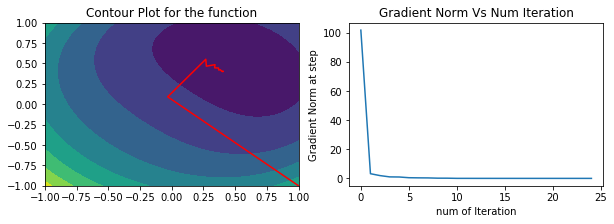

,pk,alpha,xk
0,"[-70.0, 74.0]",0.014744,"[-0.0320812, 0.0910573]"
1,"[1.75531, 2.69451]",0.171135,"[0.268314, 0.552183]"
2,"[0.101427, -1.90721]",0.044834,"[0.272862, 0.466676]"
3,"[0.993253, 0.278158]",0.068370,"[0.34077, 0.485693]"
4,"[-0.0721905, -0.953454]",0.040811,"[0.337824, 0.446782]"
5,"[0.463049, -0.0326612]",0.065469,"[0.368139, 0.444643]"
6,"[0.0380499, -0.36967]",0.066603,"[0.370673, 0.420022]"
7,"[0.312434, 0.0877622]",0.037134,"[0.382275, 0.423281]"
8,"[0.0840123, -0.121513]",0.173347,"[0.396839, 0.402218]"
9,"[0.106924, 0.0812646]",0.030616,"[0.400112, 0.404706]"


In [22]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1-1)**2 + (x2-1)**2 + 10*(x1**2 + x2**2 -0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
print(deriv_1[0])
print(deriv_1[1])

# Initialize Xk
xk = np.array([1,-1], dtype='float32')

# fx_array, gradientNorm_arr = iterateNonQuadratic(f, xk, deriv_1, 
#                                                  function5b, objective5b,
#                                                  numFeature=2, numSteps=300, should_print=50)  


fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterateNonQuadratic(f, xk, deriv_1, 
                                                 function5b, objective5b,
                                                 numFeature=2, numSteps=300, should_print=50)  

print(len(pk_arr), len(alpha_arr), len(xk1_arr))
outData = pd.DataFrame(columns=["pk","alpha","xk"])
outData["pk"] = pk_arr
outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr


###########  Plot  ###########
x1_x2 = np.vstack(([1,-1], np.asarray(xk1_arr)))
u = np.linspace(-1,1,5000)
v = np.linspace(-1,1,5000)
x1,x2 = np.meshgrid(u,v)
z = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData

In [21]:
# c = 10
# x1 = Symbol('x1')
# x2 = Symbol('x2')
# f = pow(x1-1, 2) + pow(x2-1, 2) + c*pow((pow(x1,0) + pow(x2,2) - 0.25), 2)
# deriv_1 = np.array([f.diff(x1), f.diff(x2)])
# Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
#                     [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])

# print ('Q: \n', Q)


# # Initialize Xk
# xk = np.array([1,-1], dtype='float32')

# # fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

# fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=100)

# plot([fx_array, gradientNorm_arr])

### c: (x1 - 1)**2 + (x2 - 1)**2 + 100*(x1**2 + x2**2 - 0.25)**2

400*x1*(x1**2 + x2**2 - 0.25) + 2*x1 - 2
400*x2*(x1**2 + x2**2 - 0.25) + 2*x2 - 2

##########################################################
Function F at x: f(x)  0.845751224842253
Gradient at xk9 is:  [ 1.05012631  0.25713724]
####### Gradient Norm:  1.08115
The updated Value xk10 is 
 [ 0.41261211  0.30533889]

##########################################################
Function F at x: f(x)  0.832473526056737
Gradient at xk19 is:  [ 0.21872775 -0.11709768]
####### Gradient Norm:  0.2481
The updated Value xk20 is 
 [ 0.38824162  0.32947758]

##########################################################
Function F at x: f(x)  0.827654875396328
Gradient at xk29 is:  [ 0.0075177   0.00809907]
####### Gradient Norm:  0.0110504
The updated Value xk30 is 
 [ 0.35977414  0.35987833]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)
32 32 32


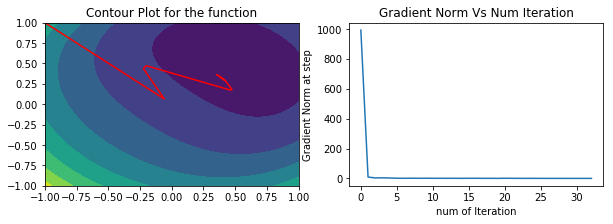

,pk,alpha,xk
0,"[-700.0, 704.0]",0.001513,"[-0.0590086, 0.06506]"
1,"[-3.60075, 8.17511]",0.045566,"[-0.223082, 0.43757]"
2,"[1.66387, 2.65931]",0.013256,"[-0.201026, 0.472821]"
3,"[3.5255, -1.58804]",0.189023,"[0.465375, 0.172646]"
4,"[1.74309, 1.90469]",0.005115,"[0.47429, 0.182388]"
5,"[-0.507377, 1.03579]",0.077061,"[0.435191, 0.262207]"
6,"[-0.288033, 0.621434]",0.056222,"[0.418997, 0.297146]"
7,"[-1.15994, -0.240976]",0.006432,"[0.411536, 0.295596]"
8,"[0.0675735, 0.611988]",0.015920,"[0.412612, 0.305339]"
9,"[-1.05013, -0.257137]",0.006272,"[0.406025, 0.303726]"


In [24]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1-1)**2 + (x2-1)**2 + 100*(x1**2 + x2**2 -0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
print(deriv_1[0])
print(deriv_1[1])

# Initialize Xk
xk = np.array([1,-1], dtype='float32')

# fx_array, gradientNorm_arr = iterateNonQuadratic(f, xk, deriv_1, 
#                                                  function5c, objective5c,
#                                                  numFeature=2, numSteps=100, should_print=10)  


fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterateNonQuadratic(f, xk, deriv_1, 
                                                 function5c, objective5c,
                                                 numFeature=2, numSteps=100, should_print=10)  

print(len(pk_arr), len(alpha_arr), len(xk1_arr))
outData = pd.DataFrame(columns=["pk","alpha","xk"])
outData["pk"] = pk_arr
outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr


###########  Plot  ###########
x1_x2 = np.vstack(([-1,1], np.asarray(xk1_arr)))
u = np.linspace(-1,1,5000)
v = np.linspace(-1,1,5000)
x1,x2 = np.meshgrid(u,v)
z = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData